In [1]:
!pip install be-great

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
from be_great import GReaT

import pandas as pd

data = pd.read_csv("cirrhosis_train.csv")
data.head(5)


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,294,1302,C,D-penicillamine,22111,M,N,Y,N,N,6.6,1000.0,3.07,88.0,3150.0,193.00,133.0,299.0,10.9,4.0
1,267,179,D,D-penicillamine,25899,F,Y,Y,Y,Y,6.6,222.0,2.33,138.0,620.0,106.00,91.0,195.0,12.1,4.0
2,36,3611,C,Placebo,20604,F,N,N,N,N,0.3,172.0,3.39,18.0,558.0,71.30,96.0,311.0,10.6,2.0
3,184,974,D,Placebo,13736,F,N,Y,N,N,11.0,674.0,3.55,358.0,2412.0,167.40,140.0,471.0,9.8,3.0
4,170,2692,C,D-penicillamine,17774,F,N,N,N,N,1.2,390.0,3.61,32.0,1509.0,88.35,52.0,263.0,9.0,3.0


In [3]:
model = GReaT(llm='distilgpt2', batch_size=20, epochs=700, save_steps=4000)
model.fit(data)
synthetic_data = model.sample(n_samples=len(data),max_length=2000)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.070100
1000,0.850300
1500,0.800900
2000,0.764000
2500,0.715600
3000,0.664300
3500,0.616800
4000,0.579200
4500,0.548100
5000,0.527000


  0%|          | 0/220 [00:00<?, ?it/s]The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
267it [00:06, 39.02it/s]


In [4]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,294,1302,C,D-penicillamine,22111,M,N,Y,N,N,6.6,1000.0,3.07,88.0,3150.0,193.00,133.0,299.0,10.9,4.0
1,267,179,D,D-penicillamine,25899,F,Y,Y,Y,Y,6.6,222.0,2.33,138.0,620.0,106.00,91.0,195.0,12.1,4.0
2,36,3611,C,Placebo,20604,F,N,N,N,N,0.3,172.0,3.39,18.0,558.0,71.30,96.0,311.0,10.6,2.0
3,184,974,D,Placebo,13736,F,N,Y,N,N,11.0,674.0,3.55,358.0,2412.0,167.40,140.0,471.0,9.8,3.0
4,170,2692,C,D-penicillamine,17774,F,N,N,N,N,1.2,390.0,3.61,32.0,1509.0,88.35,52.0,263.0,9.0,3.0


In [5]:
synthetic_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,125.0,1735.0,C,Placebo,16154.0,F,N,N,N,N,1.2,317.0,3.43,75.0,975.0,125.55,137.0,221.0,9.9,3.0
1,295.0,1230.0,CL,D-penicillamine,12912.0,M,N,N,N,N,2.4,646.0,3.93,102.0,855.0,127.71,194.0,306.0,10.3,2.0
2,278.0,1487.0,C,Placebo,22977.0,F,N,Y,N,N,3.0,373.0,3.56,97.0,1664.0,136.00,169.0,165.0,13.2,4.0
3,17.0,1765.0,C,Placebo,19221.0,F,N,N,Y,N,0.5,244.0,3.34,41.0,721.0,65.10,80.0,165.0,11.7,2.0
4,34.0,1568.0,D,Placebo,18733.0,F,N,Y,N,N,6.7,267.0,3.54,159.0,1787.0,187.55,104.0,338.0,10.1,4.0


In [6]:
synthetic_data.to_csv('cirrhosis_synthetic_GReaT_TSTR.csv',encoding='utf-8',index= False)

### Assessing duplicates

In [7]:
def assess_duplicates(real,fake):
# Find duplicates within the 'real' dataset
    duplicates_in_real = real[real.duplicated(keep=False)]  # keep=False marks all duplicates

    # Find duplicates within the 'synthetic' dataset
    duplicates_in_synthetic = fake[fake.duplicated(keep='first')]  # keep=False marks all duplicates

    # Print the number of duplicate rows in each DataFrame
    print("Number of duplicate rows in 'real' dataset:", len(duplicates_in_real))
    print("Number of duplicate rows in 'synthetic' dataset:", len(duplicates_in_synthetic))


    # Find common duplicates between the two datasets
    common_duplicates = pd.merge(real, fake, how='inner').drop_duplicates()

    # Print the number of common duplicate rows between 'real' and 'synthetic'
    print("Number of common duplicate rows between 'real' and 'synthetic':", len(common_duplicates))

In [8]:
assess_duplicates(data,synthetic_data)

Number of duplicate rows in 'real' dataset: 0
Number of duplicate rows in 'synthetic' dataset: 0
Number of common duplicate rows between 'real' and 'synthetic': 0


## Using Table Evaluator for Data Evaluation

In [9]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install table_evaluator
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.0.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00


In [10]:
X_test = pd.read_csv("cirrhosis_test.csv")

(56, 20) (220, 20)


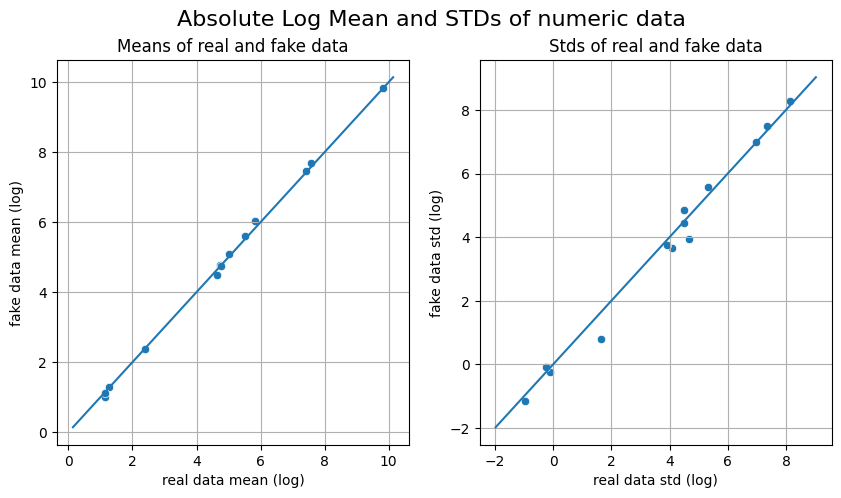

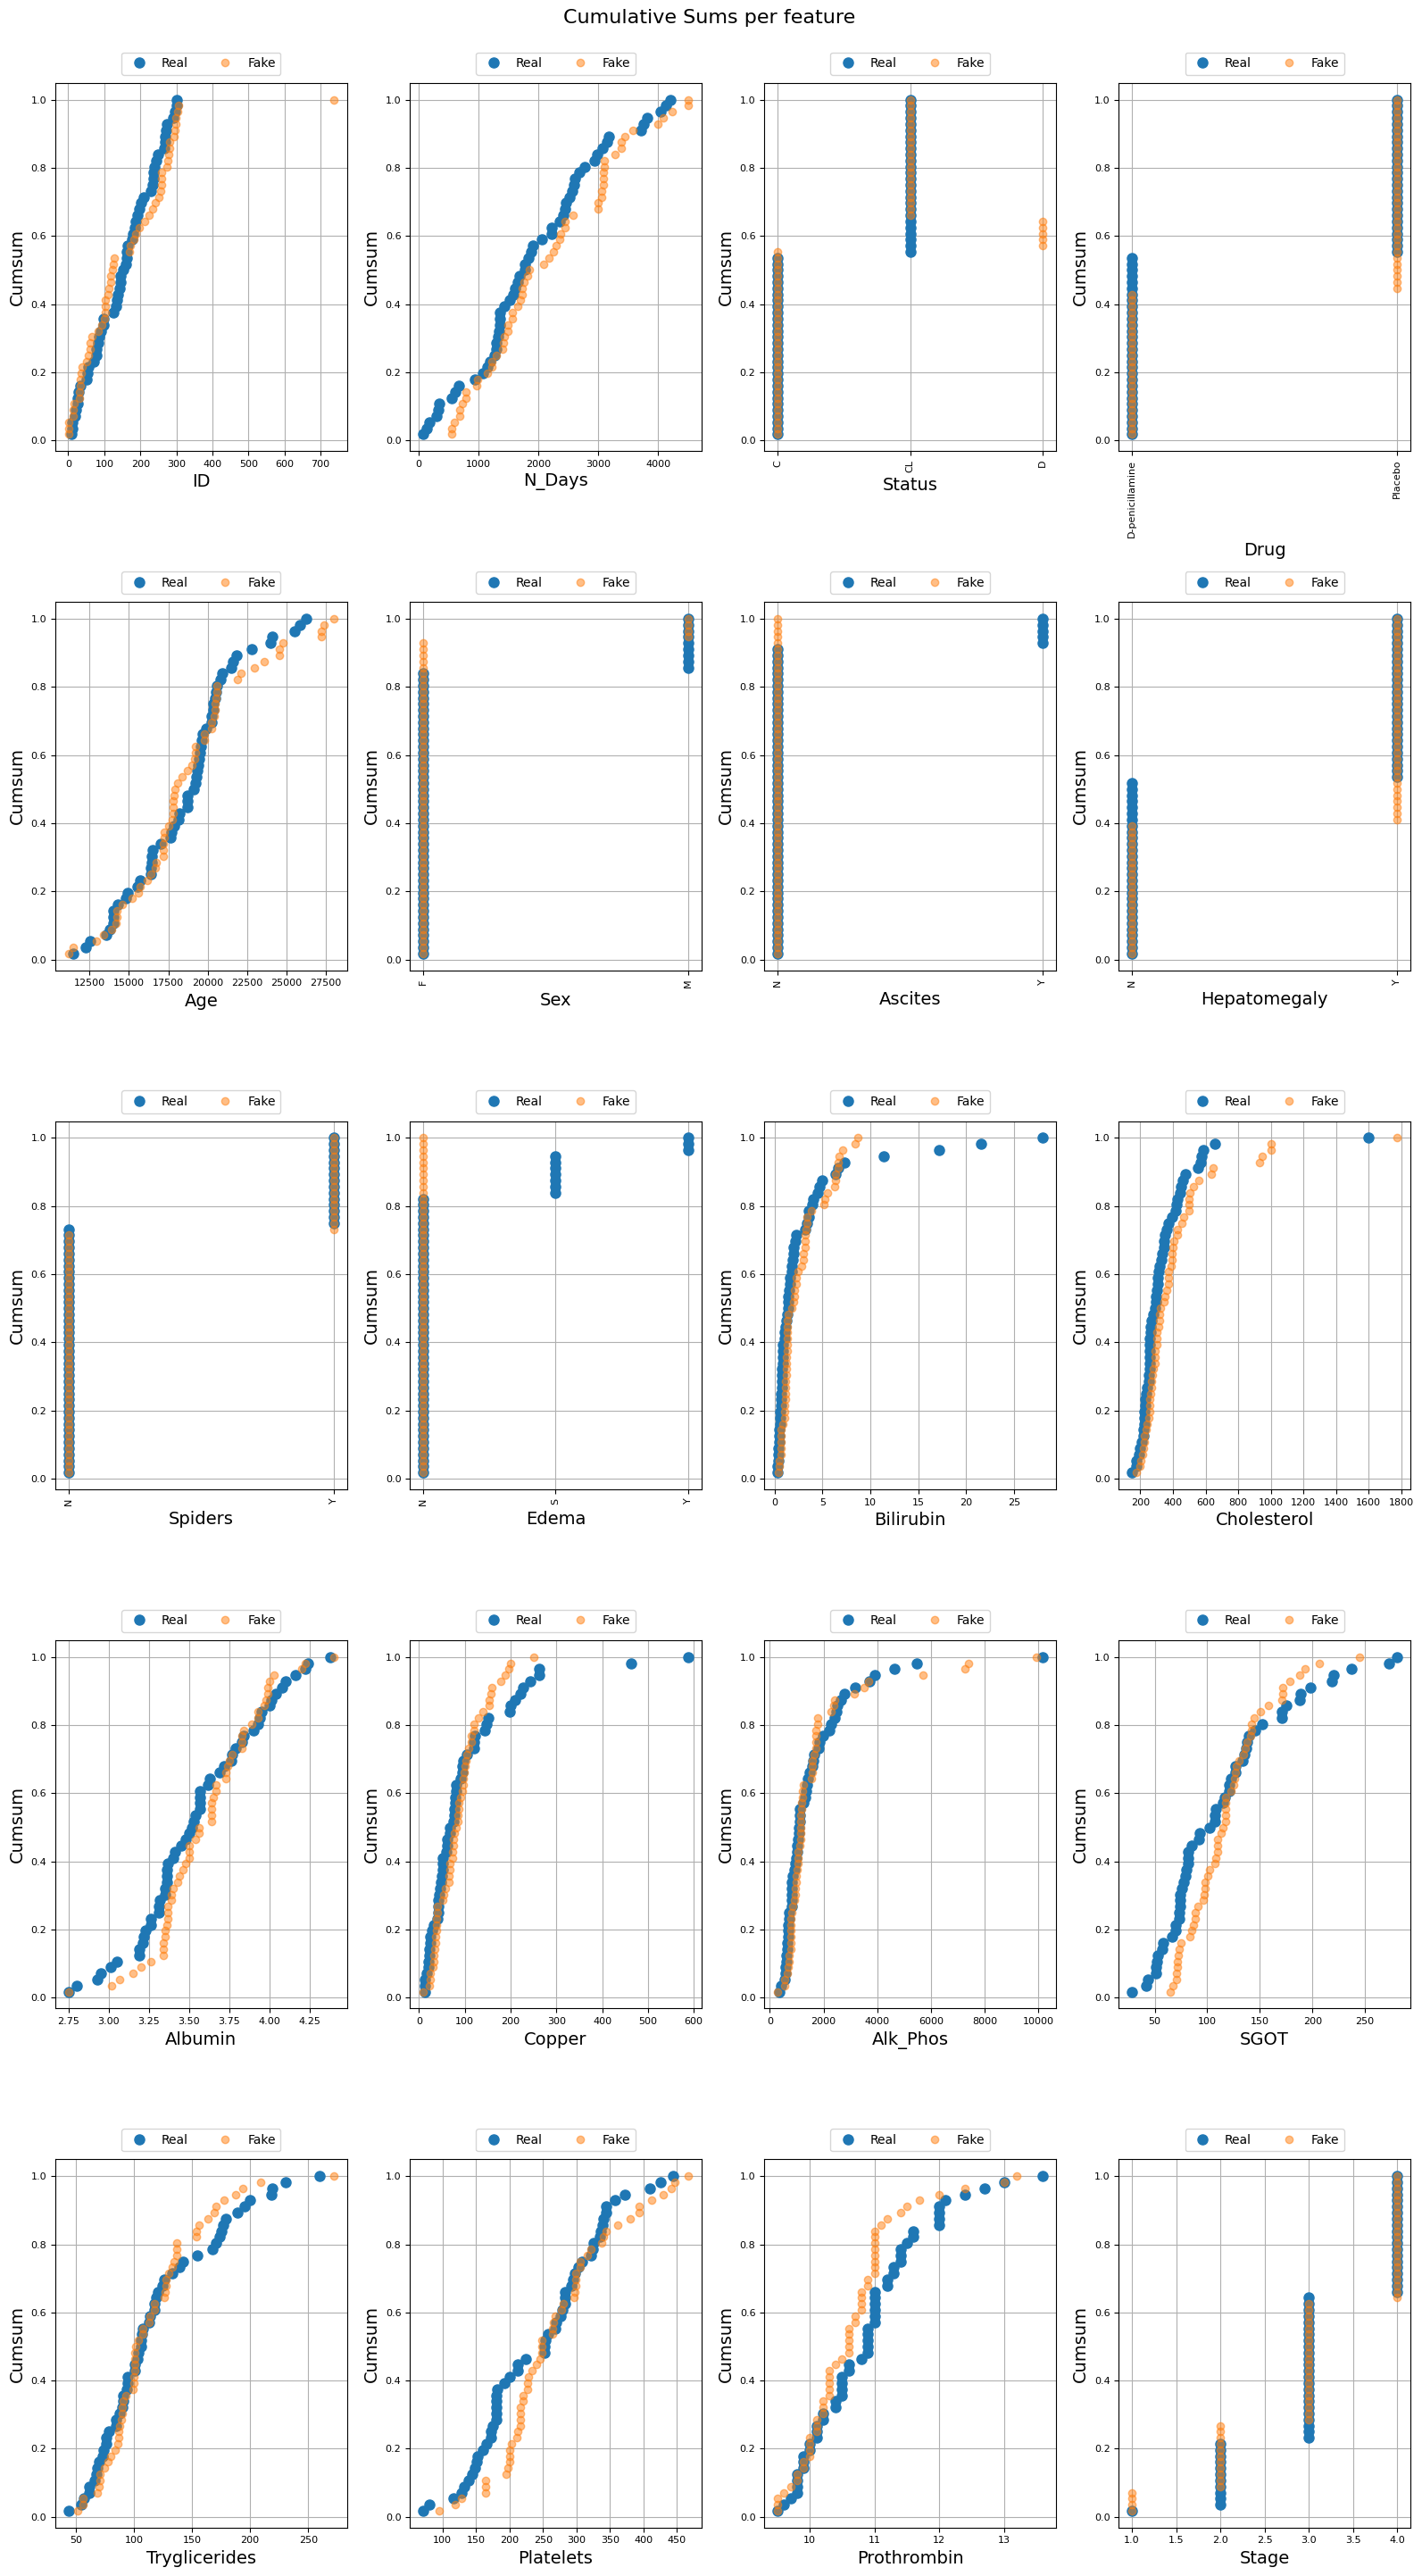

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormat

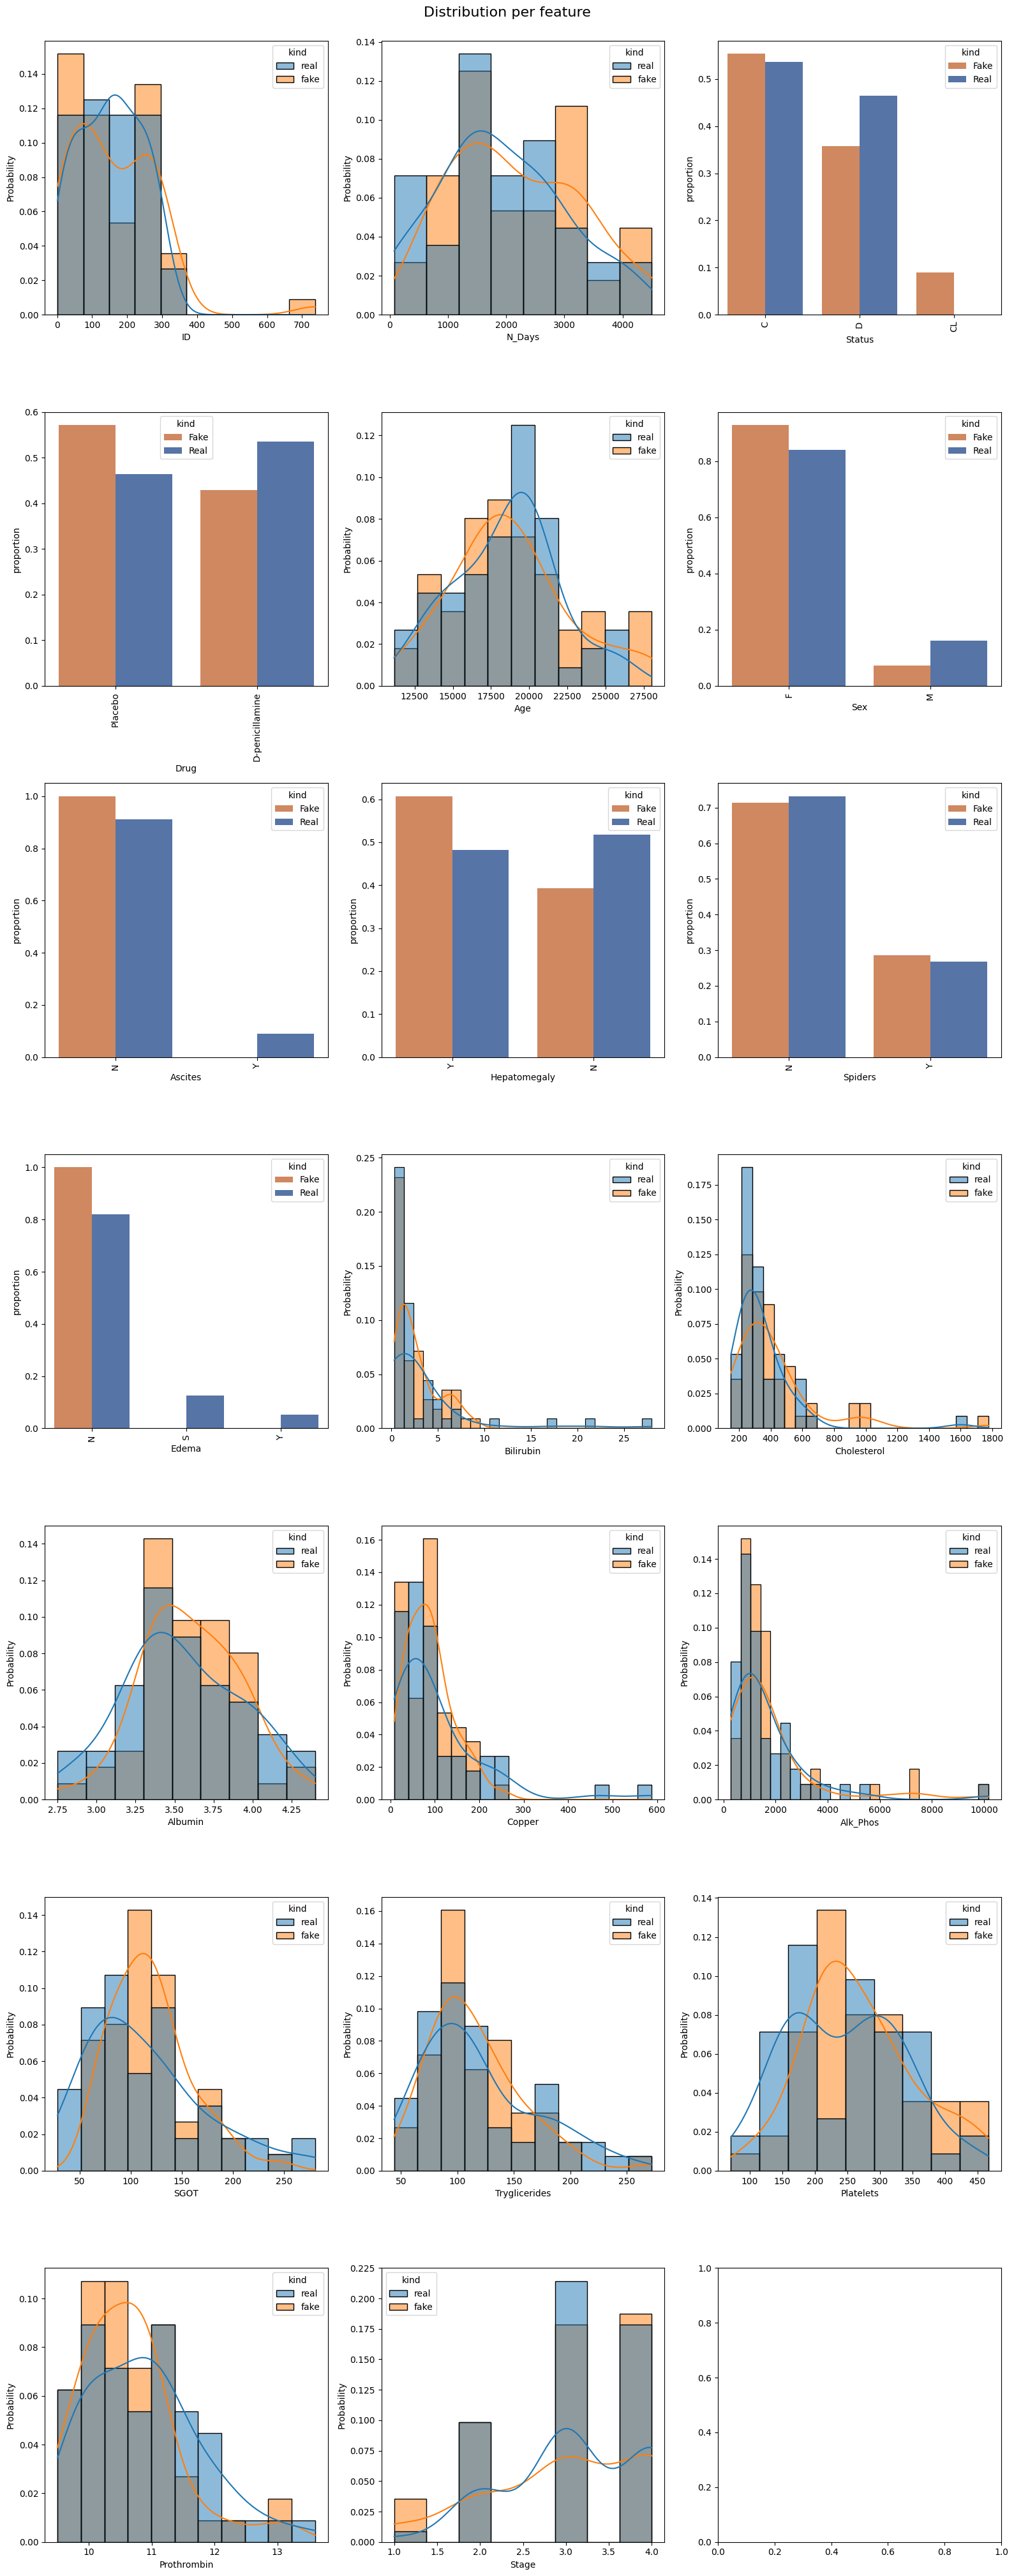

/usr/local/lib/python3.10/dist-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:705: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/usr/local/lib/python3.10/dist-packages/dython/nominal.py:704: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/usr/local/li

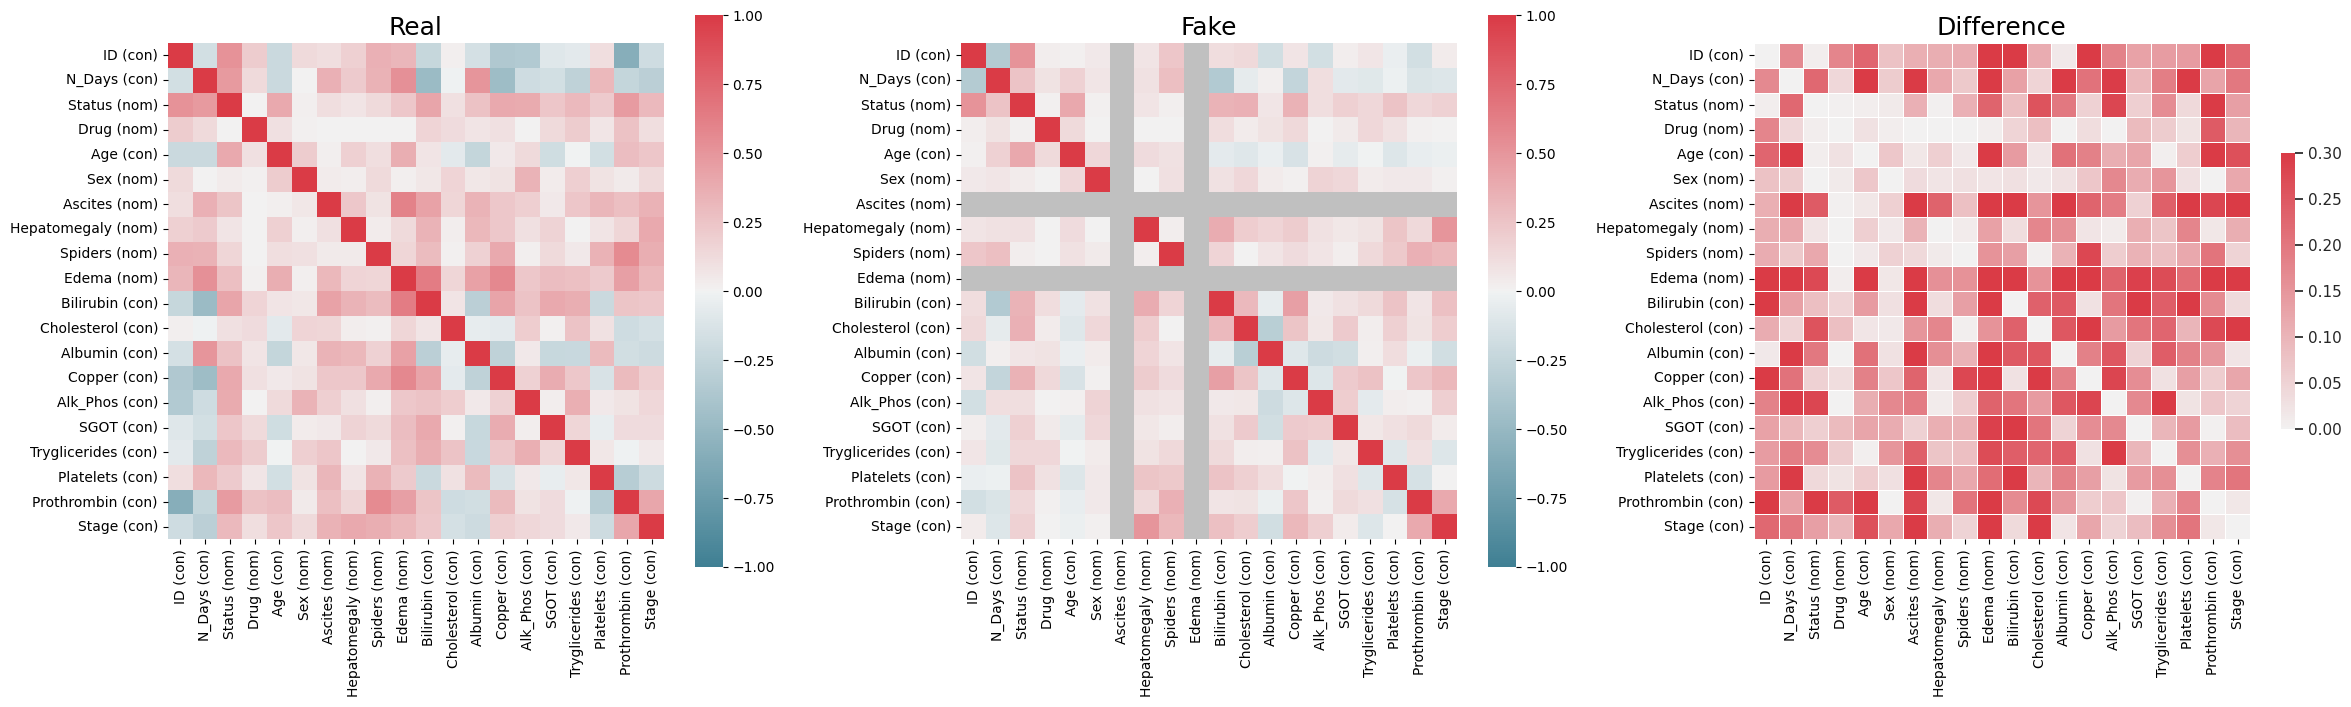

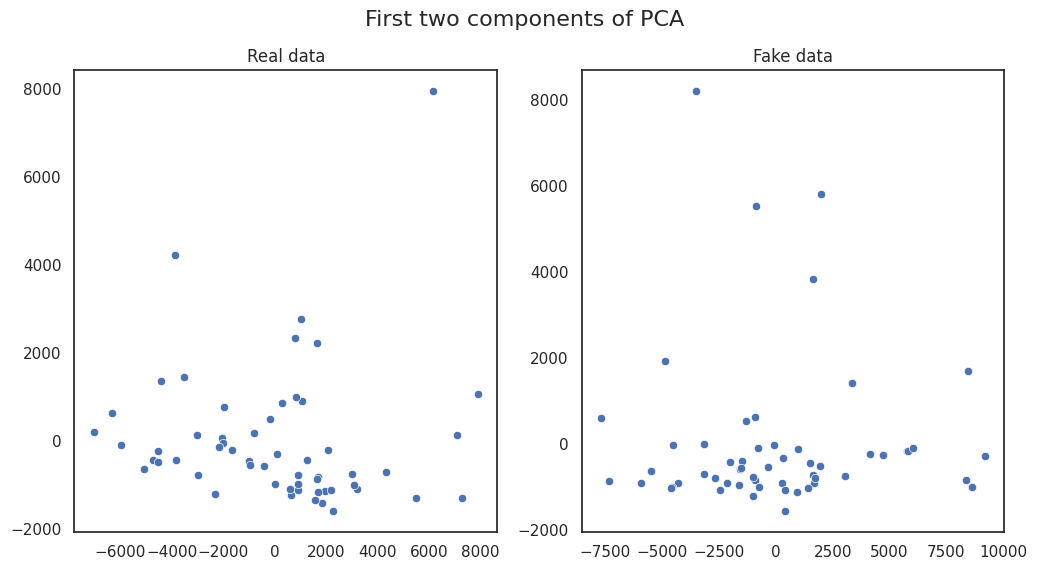

In [12]:
from table_evaluator import TableEvaluator
print(X_test.shape,synthetic_data.shape)
table_evaluator = TableEvaluator(X_test,synthetic_data[:len(X_test)])
table_evaluator.visual_evaluation()

In [ ]:
table_evaluator.evaluate(target_col='Status')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.2500   0.3333              0.2000
DecisionTreeClassifier_real   0.6667   0.4167              0.1429
LogisticRegression_fake       0.2500   0.3333              0.4118
LogisticRegression_real       0.9167   0.6667              0.4118
MLPClassifier_fake            0.2500   0.4167              0.1429
MLPClassifier_real            0.5833   0.4167              0.0435
RandomForestClassifier_fake   0.2500   0.5000              0.2000
RandomForestClassifier_real   0.5000   0.7500              0.3333

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    3.2148
nearest neighbor std                     0.5697

Miscellaneous results:
                                  Result
Column Cor

## Using Synthetic Data Vault for Data Evaluation

In [15]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


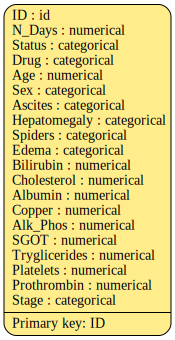

In [16]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
metadata.visualize()

In [17]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality

diagnostic = run_diagnostic(
    real_data=X_test,
    synthetic_data=synthetic_data,
    metadata=metadata
)

quality_report = evaluate_quality(
    X_test,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 20/20 [00:00<00:00, 1004.64it/s]|
Data Validity Score: 96.61%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 298.85it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 98.31%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 20/20 [00:00<00:00, 689.56it/s]|
Column Shapes Score: 88.03%

(2/2) Evaluating Column Pair Trends: |██████████| 190/190 [00:01<00:00, 150.71it/s]|
Column Pair Trends Score: 91.94%

Overall Score (Average): 89.99%



In [18]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,N_Days,KSComplement,0.869805
1,Status,TVComplement,0.940260
2,Drug,TVComplement,0.864286
3,Age,KSComplement,0.870130
4,Sex,TVComplement,0.925649
5,Ascites,TVComplement,0.942532
6,Hepatomegaly,TVComplement,0.909416
7,Spiders,TVComplement,0.977597
8,Edema,TVComplement,0.894156
9,Bilirubin,KSComplement,0.816234


### Calculate Range Coverage and KSComplement for Numerical Variables

In [19]:
from sdmetrics.single_column import RangeCoverage, KSComplement
for i in ['Bilirubin','Albumin']:
  range_cov = RangeCoverage.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  ks = KSComplement.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  print(f"Range coverage for {i} is: {range_cov}")
  print(f"KSComplement for {i} is: {ks}")

Range coverage for Bilirubin is: 0.6173285198555956
KSComplement for Bilirubin is: 0.8162337662337662
Range coverage for Albumin is: 1
KSComplement for Albumin is: 0.9042207792207793


### Calculate Category Coverage and TVComplement for Categorical Variables

In [20]:

from sdmetrics.single_column import CategoryCoverage, TVComplement
for i in ['Status','Stage']:
  cat_cov = CategoryCoverage.compute(
    real_data=X_test[i],
    synthetic_data=synthetic_data[i]
  )
  tv = TVComplement.compute(
      real_data=X_test[i],
      synthetic_data=synthetic_data[i]
  )
  print(f"Category coverage for {i} is: {cat_cov}")
  print(f"TVComplement for {i} is: {tv}")

Category coverage for Status is: 1.0
TVComplement for Status is: 0.9402597485505565
Category coverage for Stage is: 1.0
TVComplement for Stage is: 0.9233766233766234


### Looking at Wasserstein Distance and KL Divergence for Testing vs Synthetic and Testing vs Training

In [21]:
from scipy.stats import wasserstein_distance
wasserstein_distances = {}
for column in X_test.columns[10:]:
    wasserstein_dist = wasserstein_distance(X_test[column], synthetic_data[column])
    wasserstein_distances[column] = wasserstein_dist

In [22]:
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'Comparing Testing data and Synthetic Data {column}: {distance}')

Comparing Testing data and Synthetic Data Bilirubin: 0.9816558441558447
Comparing Testing data and Synthetic Data Cholesterol: 38.98571428571425
Comparing Testing data and Synthetic Data Albumin: 0.05581493506493507
Comparing Testing data and Synthetic Data Copper: 24.241558441558446
Comparing Testing data and Synthetic Data Alk_Phos: 304.5219480519477
Comparing Testing data and Synthetic Data SGOT: 14.523538961038955
Comparing Testing data and Synthetic Data Tryglicerides: 8.285064935064929
Comparing Testing data and Synthetic Data Platelets: 16.37824675324675
Comparing Testing data and Synthetic Data Prothrombin: 0.2480519480519482
Comparing Testing data and Synthetic Data Stage: 0.12954545454545452


In [23]:
wasserstein_distances = {}
for column in X_test.columns[10:]:
    wasserstein_dist = wasserstein_distance(X_test[column], data[column])
    wasserstein_distances[column] = wasserstein_dist
# Print Wasserstein distances for each feature
for column, distance in wasserstein_distances.items():
    print(f'Comparing Testing data and Training Data {column}: {distance}')

Comparing Testing data and Training Data Bilirubin: 0.6394480519480523
Comparing Testing data and Training Data Cholesterol: 40.025974025974
Comparing Testing data and Training Data Albumin: 0.07491233766233764
Comparing Testing data and Training Data Copper: 13.235714285714295
Comparing Testing data and Training Data Alk_Phos: 443.8344155844153
Comparing Testing data and Training Data SGOT: 14.910636363636364
Comparing Testing data and Training Data Tryglicerides: 10.212337662337656
Comparing Testing data and Training Data Platelets: 21.6775974025974
Comparing Testing data and Training Data Prothrombin: 0.24383116883116884
Comparing Testing data and Training Data Stage: 0.10681818181818184


In [24]:
# Calculate KL Divergence for each feature
from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[10:]:
    kl_divergence = entropy(X_test[column], synthetic_data[:56][column])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f'For Training vs Synthetic Data{column}: {divergence}')

For Training vs Synthetic DataBilirubin: 0.9781633983984962
For Training vs Synthetic DataCholesterol: 0.25360509417994787
For Training vs Synthetic DataAlbumin: 0.008993792672840867
For Training vs Synthetic DataCopper: 0.5328072199792644
For Training vs Synthetic DataAlk_Phos: 0.6840903330678689
For Training vs Synthetic DataSGOT: 0.14370776024283377
For Training vs Synthetic DataTryglicerides: 0.12594111783411333
For Training vs Synthetic DataPlatelets: 0.09468343630758341
For Training vs Synthetic DataProthrombin: 0.006180757943509215
For Training vs Synthetic DataStage: 0.10441240084734049


In [25]:
# Calculate KL Divergence for each feature
from scipy.stats import entropy
kl_divergences = {}
for column in X_test.columns[10:]:
    kl_divergence = entropy(X_test[column], data[:56][column])
    kl_divergences[column] = kl_divergence

# Print KL Divergences for each feature
for column, divergence in kl_divergences.items():
    print(f'For Training vs Testing Data {column}: {divergence}')

For Training vs Testing Data Bilirubin: 1.4732715801585026
For Training vs Testing Data Cholesterol: 0.2917327081936546
For Training vs Testing Data Albumin: 0.008788944578457476
For Training vs Testing Data Copper: 0.9832247164200608
For Training vs Testing Data Alk_Phos: 0.45457853945850846
For Training vs Testing Data SGOT: 0.21134063569227338
For Training vs Testing Data Tryglicerides: 0.14009786597036217
For Training vs Testing Data Platelets: 0.1610055800360398
For Training vs Testing Data Prothrombin: 0.009636689035554875
For Training vs Testing Data Stage: 0.0836247320860429


In [28]:
!pip install great_expectations

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 14.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 48.4 MB/s eta 0:00:00


In [29]:
import great_expectations as ge
def check_profile(df):
    df = ge.from_pandas(df)
    # Define expectations
    df.expect_column_values_to_be_between('Age', 9598, 28650)
    df.expect_column_values_to_be_between('Bilirubin', 0.3, 28)
    df.expect_column_values_to_be_between('Cholesterol', 120, 1775)
    df.expect_column_values_to_be_between('Albumin', 1.96, 4.4)
    df.expect_column_values_to_be_between('Copper', 4, 588)
    df.expect_column_values_to_be_between('Alk_Phos', 289, 13863)
    df.expect_column_values_to_be_between('SGOT', 28.3, 458)
    df.expect_column_values_to_be_between('Tryglicerides', 33, 598)
    df.expect_column_values_to_be_between('Platelets', 62, 563)
    df.expect_column_values_to_be_between('Prothrombin', 9, 17.1)


    # View results
    #print(df.get_expectation_suite())
    results = df.validate()
    for result in results['results']:
        if not result['success']:
            column_name = result['expectation_config']['kwargs']['column']
            unexpected_count = result['result']['unexpected_count']
            print(f"Column '{column_name}' has {unexpected_count} out-of-range values.")


In [30]:
## Something changed in the package. Used to work
check_profile(synthetic_data)

AttributeError: module 'great_expectations' has no attribute 'from_pandas'

In [26]:
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient for each feature
pearson_correlations = {}
for column in X_test.columns[10:]:
    correlation, _ = pearsonr(X_test[column], synthetic_data[:56][column])
    pearson_correlations[column] = correlation

# Print Pearson correlation coefficients for each feature
for column, correlation in pearson_correlations.items():
    print(f' Comparing testing and synthetic data {column}: {correlation}')

 Comparing testing and synthetic data Bilirubin: 0.07072314183462276
 Comparing testing and synthetic data Cholesterol: -0.04009891457999591
 Comparing testing and synthetic data Albumin: 0.04323104422738937
 Comparing testing and synthetic data Copper: -0.01295129814164072
 Comparing testing and synthetic data Alk_Phos: -0.1068033296142778
 Comparing testing and synthetic data SGOT: 0.12138012621230276
 Comparing testing and synthetic data Tryglicerides: 0.0726546317443957
 Comparing testing and synthetic data Platelets: 0.17239159121352166
 Comparing testing and synthetic data Prothrombin: -0.059569654550398
 Comparing testing and synthetic data Stage: -0.08036182459019628


In [27]:
# Check for MSE and r2
from sklearn.metrics import mean_squared_error, r2_score
# Calculate MSE between testing_data and real_data
mse_real = mean_squared_error(X_test[:56]['Cholesterol'], data[:56]['Cholesterol'])
print("MSE between Testing Data and Real Data:", mse_real)

# Calculate MSE between testing_data and synthetic_data
mse_synthetic = mean_squared_error(X_test[:56]['Cholesterol'], synthetic_data[:56]['Cholesterol'])
print("MSE between Testing Data and Synthetic Data:", mse_synthetic)

# Calculate R-squared (R2) score
r2 = r2_score(X_test[:56]['Cholesterol'], data[:56]['Cholesterol'])
print("R-squared Score (between Testing Data and Real Data):", r2)

r2 = r2_score(X_test[:56]['Cholesterol'], synthetic_data[:56]['Cholesterol'])
print("R-squared Score (between Testing Data and Synthetic Data):", r2)

MSE between Testing Data and Real Data: 131227.01785714287
MSE between Testing Data and Synthetic Data: 122278.58928571429
R-squared Score (between Testing Data and Real Data): -2.1461407110624195
R-squared Score (between Testing Data and Synthetic Data): -1.9316039800726652
